In [28]:
policy_sampler = [85.34, 78.39, 95.08, 90.02, 96.54, 87.74, 94.61, 96.95, 96.92, 79.77]
ub = [111.42, 85.66, 117.77, 119.85, 78.30, 123.08, 110.55, 126.23, 119.87, 89.91]
wo_ps = [59.25, 83.43, 88.35, 96.90, 96.50, 66.11, 58.67, 58.37, 65.54, 68.20]


import numpy as np

def calculate_mean_and_variance(data):
    # 计算均值
    mean = sum(data) / len(data)
    
    # 计算方差
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    
    return mean, np.sqrt(variance)


print(calculate_mean_and_variance(policy_sampler))
print(calculate_mean_and_variance(ub))
print(calculate_mean_and_variance(wo_ps))

(90.136, 6.723857821221387)
(108.26399999999998, 16.316945915213424)
(74.132, 14.797517224183252)


In [4]:
import numpy as np
from scipy.signal import convolve2d

GLOBAL_MAP = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

def heuristic(a, b):
    # Manhattan distance on a square grid
    return abs(b[0] - a[0]) + abs(b[1] - a[1])

class Memory:
    def __init__(self):
        self.global_img = 0
        self.map_memo = []
        self.local_position = None
        self.local_direction = None
        self.explore_step = None
        self.position_memo = [] # to remember the last matches for localization
        self.apath = None # cached path for path planning towards centers
        self.betray = True
        self.betray_info = [] # 0 for not betray, 1 for betray
    
    def betray_update(self): # How to do this?
        self.betray_info = ...
        self.betray = True
        
    def reset(self):
        self.map_memo = []
        self.local_position = None
        self.local_direction = None
        self.explore_step = None
        self.position_memo = []
        self.apath = None
        self.betray_update()

memory = Memory()
memory.local_direction = 'down'
memory.local_position = (11, 7)

# grid_info = [
#     ['WALL', 'EMPTY', 'EMPTY', 'EMPTY', 'EMPTY'],
#     ['WALL', 'EMPTY', 'EMPTY', 'RED', 'BLUE'],
#     ['WALL', 'EMPTY', 'WALL', 'BLUE', 'BLUE'],
#     ['WALL', 'EMPTY', 'SELF', 'BLUE', 'BLUE'],
#     ['WALL', 'EMPTY', 'WALL', 'EMPTY', 'EMPTY'],
# ]

grid_info = [['EMPTY', 'WALL', 'WALL', 'WALL', 'WALL'], ['RED', 'EMPTY', 'WALL', 'EMPTY', 'EMPTY'], ['RED', 'EMPTY', 'WALL', 'EMPTY', 'EMPTY'], ['RED', 'EMPTY', 'SELF', 'EMPTY', 'EMPTY'], ['EMPTY', 'EMPTY', 'EMPTY', 'EMPTY', 'EMPTY']]

In [8]:
def nearest_card(grid_info, color):
    card_pos = []
    arow, acol = memory.local_position
    row, col = len(grid_info), len(grid_info[0])
    for i in range(row):
        for j in range(col):
            if grid_info[i][j] == color:
                card_pos.append((i, j))

    near_card = None
    min_dist = 1000
    for card in card_pos:
        dist = heuristic((3, 2), card) # 3, 2 is the agent relative position
        if dist < min_dist:
            min_dist = dist
            near_card = card
    r_card = np.array((3, 2)) - np.array(near_card)

    if memory.local_direction == 'left':
        r_card = np.array([r_card[1], -r_card[0]])
    elif memory.local_direction == 'down':
        print(r_card)
        r_card = np.array([-r_card[0], -r_card[1]])
    elif memory.local_direction == 'right':
        r_card = np.array([-r_card[1], r_card[0]])
    
    arow, acol = memory.local_position
    return (arow + r_card[0], acol + r_card[1]) # global position of the card
    

def add_card_as_obstacle(grid_info, color):
    card_pos = []
    color_map = GLOBAL_MAP.copy()
    arow, acol = memory.local_position
    row, col = len(grid_info), len(grid_info[0])
    for i in range(row):
        for j in range(col):
            if grid_info[i][j] == color:
                card_pos.append((i, j))
    for pos in card_pos:
        rpos = np.array((3, 2)) - np.array(pos)
        if memory.local_direction == 'left':
            rpos = np.array([rpos[1], -rpos[0]])
        elif memory.local_direction == 'down':
            rpos = np.array([-rpos[0], -rpos[1]])
        elif memory.local_direction == 'right':
            rpos = np.array([-rpos[1], rpos[0]])
        
        color_map[arow + rpos[0], acol + rpos[1]] = 1
    return color_map
    
add_card_as_obstacle(grid_info, 'BLUE')[2:7, 8:13]
nearest_card(grid_info, 'RED')


[0 2]


(11, 5)

In [10]:
import numpy as np
from scipy.signal import convolve2d

GLOBAL_MAP = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

local_map = np.array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

# local_map_next = np.array([[0, 0, 0, 0, 0],
#        [1, 1, 1, 1, 1],
#        [0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 1]])

# local_map_third = np.array([[1, 1, 1, 1, 1],
#        [0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 1]])


def find_matches(global_map, local_map, last_matches=None):
    adject = [(3, 2), (2, 3), (1, 2), (2, 1)]
    matches = []
    global_map_height, global_map_width = global_map.shape

    for rotation in range(4):
        rotated_map = np.rot90(local_map, k=rotation)
        rotated_map_height, rotated_map_width = rotated_map.shape
        
        match_list = []
        for row in range(global_map_height - rotated_map_height + 1):
            for col in range(global_map_width - rotated_map_width + 1):
                sub_map = global_map[row:row + rotated_map_height, col:col + rotated_map_width]
                if np.array_equal(sub_map, rotated_map):
                    center_row_adjust, center_col_adjust = adject[rotation]
                    match = (row + center_row_adjust, col + center_col_adjust)
                    if min(match) < 3 or match[0] > 15 or match[1] > 23:
                        continue
                    if last_matches is not None:
                        for last_match in last_matches[rotation]:
                            if np.sum(np.abs(np.array(match) - np.array(last_match))) == 1:
                                match_list.append(match)
                                break
                    else:
                        match_list.append(match)
        matches.append(match_list)

    return matches # up left down right

def locolization(matchs):
    directions = ['up', 'left', 'down', 'right']
    total = 0
    direction = ''
    position = None
    for i in range(4):
        total +=len(matchs[i])
        if total > 1:
            return False, None, ''
        if len(matchs[i]) == 1:
            position = matchs[i][0]
            direction = directions[i]
    return True, position, direction

# Example usage
first_matches = find_matches(GLOBAL_MAP, local_map)
# second_matches = find_matches(GLOBAL_MAP, local_map_next, first_matches)
# third_matches = find_matches(GLOBAL_MAP, local_map_third, second_matches)
# first_matches, second_matches, third_matches
print(locolization(first_matches))
# print(locolization(second_matches))
# print(locolization(third_matches))

(True, None, '')


In [11]:
import numpy as np

last_map = np.array([[1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

curr_map = np.array([[0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

np.rot90(curr_map, k=1)

array([[1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [12]:
grid_info = [['EMPTY', 'EMPTY', 'WALL', 'WALL', 'WALL'], ['EMPTY', 'EMPTY', 'EMPTY', 'EMPTY', 'WALL'], ['EMPTY', 'EMPTY', 'BLUE', 'EMPTY', 'EMPTY'], ['EMPTY', 'EMPTY', 'SELF', 'BLUE', 'WALL'], ['EMPTY', 'EMPTY', 'EMPTY', 'EMPTY', 'EMPTY']]

def info2mask(info):
    mask = np.zeros((5, 5))
    for i in range(5):
        for j in range(5):
            if info[i][j] == 'WALL':
                mask[i, j] = 1
    return mask

class Memory:
    pass
memory = Memory()
memory.local_position = (12, 17)
memory.local_direction = 'right'

def check_location_correct(grid_info):
    global memory
    if memory.local_position is None:
        return True
    
    grid_info_mask = info2mask(grid_info)
    ax, ay = memory.local_position
    if memory.local_direction == 'up':
        global_submap = GLOBAL_MAP[ax-3:ax+2, ay-2:ay+3]
    elif memory.local_direction == 'left':
        global_submap = GLOBAL_MAP[ax-2:ax+3, ay-3:ay+2]
        grid_info_mask = np.rot90(grid_info_mask, k=1)
    elif memory.local_direction == 'down':
        global_submap = GLOBAL_MAP[ax-1:ax+4, ay-2:ay+3]
        grid_info_mask = np.rot90(grid_info_mask, k=2)
    elif memory.local_direction == 'right':
        global_submap = GLOBAL_MAP[ax-2:ax+3, ay-1:ay+4]
        grid_info_mask = np.rot90(grid_info_mask, k=3)
        
    print(global_submap, grid_info_mask)
    return np.array_equal(global_submap, grid_info_mask)

check_location_correct(grid_info)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 1]
 [1 0 1 1 1]] [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 1.]]


False

In [12]:
import numpy as np
import heapq

def heuristic(a, b):
    # Manhattan distance on a square grid
    return abs(b[0] - a[0]) + abs(b[1] - a[1])

def a_star_search(start, goal, grid):
    neighbors = [(0,1), (1,0), (0,-1), (-1,0)]  # Move right, down, left, up
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data[::-1]

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < grid.shape[0]:
                if 0 <= neighbor[1] < grid.shape[1]:                
                    if grid[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # grid bounds exceeded
                    continue
            else:
                # grid bounds exceeded
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
                
    return False

# Example usage
start_point = (2, 3)  # Starting point (y, x)
goal_point = (2, 3)  # Goal point (y, x)
path = a_star_search(start_point, goal_point, GLOBAL_MAP)
print(path)


[]


In [17]:
import cv2
import os
import numpy as np

def images_to_video(input_folder='../../../img_logs', output_video='tmp.mp4', fps=3):
    # Get all files in the directory and filter for images
    files = [f for f in os.listdir(input_folder) if f.endswith('.png') and 'grid' not in f]
    # Sort files by name
    files.sort(key=lambda x: int(x.split('.')[0]))

    # Get path of first image to obtain frame size
    frame = cv2.imread(os.path.join(input_folder, files[0]))
    height, width, layers = frame.shape

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change 'mp4v' to 'XVID' if you prefer
    video = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    # Read each file, and write it to the video
    for file in files:
        img = cv2.imread(os.path.join(input_folder, file))
        video.write(img)

    # Release the video writer object
    video.release()
    print("Video created successfully")

# Specify the folder containing images, the output video path, and desired fps
images_to_video()  # Change 'path_to_images' and fps as needed


Video created successfully


In [13]:

RED_CARD_COLOR = (128, 33, 53)
BLUE_CARD_COLOR = (33, 128, 109)
EMPTY_SPACE = (0, 0, 0)
WALL = (114, 114, 114)
AGENT_VIEW_SIZE = 5
AGENT_SELF = (20, 40, 81)
AGENT_OTHER = (80, 45, 27)
DIRECTIONS = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1)
}
NAMED_ITEMS = ['EMPTY', 'WALL', 'RED', 'BLUE', 'SELF', 'OTHER'] # EMPTY 0, WALL 1
NAMED_ITEMS_IDX = {name: i for i, name in enumerate(NAMED_ITEMS)}
ACTIONS = ['NOOP', 'FORWARD', 'BACKWARD', 'STEP_LEFT', 'STEP_RIGHT', 'TURN_LEFT', 'TURN_RIGHT', 'INTERACT']
ACTION_TO_IDX = {action: i for i, action in enumerate(ACTIONS)}

def action2movement(action, direction):
    redirect = ['up', 'left', 'down', 'right']
    if direction == 'left':
        redirect = ['left', 'down', 'right', 'up']
    if direction == 'down':
        redirect = ['down', 'right', 'up', 'left']
    if direction == 'right':
        redirect = ['right', 'up', 'left', 'down']
    act_id = {'FORWARD': redirect[0], 'STEP_LEFT': redirect[1], 'BACKWARD': redirect[2], 'STEP_RIGHT': redirect[2]}
    return DIRECTIONS[act_id[action]]

action2movement('STEP_LEFT', 'left')

# def movement2action(movement, direction):
#     # input is (di, dj), output is text
#     redirect = ['FORWARD', 'STEP_LEFT', 'BACKWARD', 'STEP_RIGHT']
#     if direction == 'left':
#         redirect = ['STEP_RIGHT', 'FORWARD', 'STEP_LEFT', 'BACKWARD']
#     if direction == 'down':
#         redirect = ['BACKWARD', 'STEP_RIGHT', 'FORWARD', 'STEP_LEFT']
#     if direction == 'right':
#         redirect = ['STEP_LEFT', 'BACKWARD', 'STEP_RIGHT', 'FORWARD']
#     move_id = {DIRECTIONS['up']: redirect[0], DIRECTIONS['left']: redirect[1], DIRECTIONS['down']: redirect[2], DIRECTIONS['right']: redirect[2]}
#     return move_id[movement]

# movement2action((-1, 0), 'left')

(1, 0)

In [ ]:
from matplotlib import pyplot as plt
rm = np.array([3, 0, 5, 1]).reshape(2, 2)

x=0.9
y=0.1

v = []
for y in range(1000):
    y = y/1000
    a = np.array([x, 1-x]).reshape(1, 2)
    b= np.array([y, 1-y]).reshape(2, 1)   
    v.append(a@rm@b)
plt.plot(range(1000), np.array(v).reshape(-1))

In [342]:
rm = np.array([3, 0, 5, 1]).reshape(2, 2)

for t in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]: 
    s1 = 0
    s2 = 0
    lasty = 1.0
    lastx = 1.0
    for _ in range(10):
        x = max(0.0, lasty - t)
        # y = max(0.0, lastx - t)
        y= 1 if x >0.5 else 0
        lasty = y
        lastx = x
        a = np.array([x, 1-x]).reshape(1, 2)
        b= np.array([y, 1-y]).reshape(2, 1)   
        s1 += a@rm@b
        s2 += a@rm.T@b
    print(s1, s2)

[[30.]] [[30.]]
[[32.]] [[27.]]
[[34.]] [[24.]]
[[36.]] [[21.]]
[[38.]] [[18.]]
[[9.5]] [[12.]]
[[9.6]] [[11.6]]
[[9.7]] [[11.2]]
[[9.8]] [[10.8]]
[[9.9]] [[10.4]]


In [263]:
rm = np.array([3, 0, 5, 1]).reshape(2, 2)

x=0
y=1
a = np.array([x, 1-x]).reshape(1, 2)
b= np.array([y, 1-y]).reshape(2, 1)   
a@rm@b, a@rm.T@b

(array([[5]]), array([[0]]))

In [28]:
def oppo_coor(coor, rw):
    return (rw+coor-1)/(4-coor)

oppo_coor(0.2, 4.1777)    

0.8888684210526316

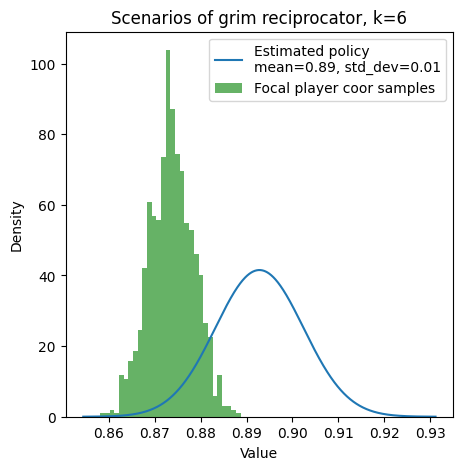

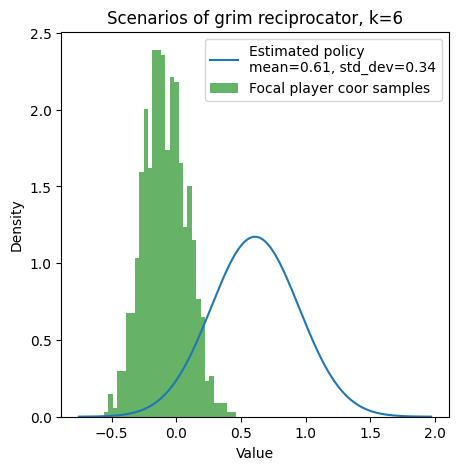

In [29]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def oppo_coor(coor, rw):
    # coor:(0, 1) my coor prob; rw: reward
    # return opponent coor prob
    return (rw + coor - 1) / (4 - coor)

def fit_gaussian(data):
    wdata = []
    for t, d in enumerate(data):
        wdata.extend([d] * np.floor(100 / (len(data) - t)).astype(int))
    mean, std_dev = norm.fit(wdata)
    return mean, std_dev

def sample_gaussian(mean, std_dev, num_samples):
    samples = np.random.normal(mean, std_dev, num_samples)
    return samples

# 1/5 1/4 1/3 2/5 1/2 3/5 2/3 3/4 4/5
def get_policy(sample):
    if sample < 1/5:
        target = (1, 4)
    elif sample < 1/4:
        target = (1, 3)
    elif sample < 1/3:
        target = (1, 2)
    elif sample < 2/5:
        target = (2, 3)
    elif sample < 1/2:
        target = (1, 1)
    elif sample < 3/5:
        target = (3, 2)
    elif sample < 2/3:
        target = (2, 1)
    elif sample < 3/4:
        target = (3, 1)
    else:
        target = (4, 1)
    return np.array(target)

def plot_gaussian_and_histogram(mean, std_dev, samples):
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = norm.pdf(x, mean, std_dev)

    plt.figure(figsize=(5, 5))

    # 画出高斯分布
    plt.plot(x, y, label=f'Estimated policy\nmean={mean:.2f}, std_dev={std_dev:.2f}')

    # 画出样本的柱状图
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Focal player coor samples')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Scenarios of grim reciprocator, k=6')
    # plt.title('Scenario of cooperative player backgroud player')
    plt.legend()
    plt.show()

# 计算高斯分布的均值和标准差
mean, std_dev = fit_gaussian([0.88, 0.9, 0.88, 0.9])

# 从高斯分布中采样
num_samples = 1000
samples = sample_gaussian(mean, std_dev/2, num_samples)
best_coors = samples - 2 * std_dev

# 画出高斯分布和柱状图
plot_gaussian_and_histogram(mean, std_dev, best_coors)



# 计算高斯分布的均值和标准差
mean, std_dev = fit_gaussian([0.9, 0.9, 0.88, 0.88, 0.9, 0.2])

# 从高斯分布中采样
num_samples = 1000
samples = sample_gaussian(mean, std_dev/2, num_samples)
best_coors = samples - 2 * std_dev

# 画出高斯分布和柱状图
plot_gaussian_and_histogram(mean, std_dev, best_coors)

